## 차원 축소
* 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
* 차원이 증가할 수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고 희소한 구조를 가지며 예측 신뢰도가 떨어짐
* 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 다중 공선성 문제로 모델의 예측 성능 저하
* 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음
* 차원 축소는 피처 선택과 피처 추출로 나눌 수 있음
* 피처 선택은 특정 피처에 종속성이 강한 불필요한 피처는 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
* 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출. 기존의 피처가 압축된 것이므로 기존 피처와는 다른 값이 됨
* 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하며 PCA, SVD, NMF은 대표적인 차원 축소 알고리즘

#### 선형대수식
* 크기와 방향을 가지고 있는 것을 vector, 반면 크기만 있는 것(질량, 온도, 길이)을 scalar이라고 한다
* 고유벡터 : 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터 Ax = ax(A 행렬, x 고유벡터, a 스칼라)
* 고유값(Eigenvalue) : 고유 벡터의 크기. 입력데이터의 분산
* 선형 변환 : 특정 벡터에 행렬  A를 곱해 새로운 벡터로 변환
* 공분산 행렬 : 두변수간의 변동을 의미. 공분산 Cov(X,Y) > 0 은 X가 증가할 때 Y도 증가
* 대칭행렬 : 고유벡터를 항상 직교행렬로 고유값을 정방 행렬로 대각화할 수 있음
* 직교행렬 : 대각원소 이외의 모든 원소가 0일때. 직교행렬의 역행렬은 직교행렬 자신의 전치행렬과 같음

#### LDA(Linear Discriminant Analysis)
* PCA와 매우 유사한 방식이며 PCA가 입력 데이터 변동성의 가장 큰 축을 찾는데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소

#### SVD, NMF
* 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법.
* 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델이나 추천 시스템에서 활발하게 사용


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(iris.data, columns = columns)
df_iris['target'] = iris.target
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'sepal_width')

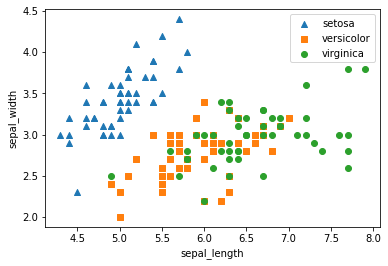

In [2]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = df_iris[df_iris.target==i]['sepal_length']
    y_axis_data = df_iris[df_iris.target==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_iris1 = df_iris.drop('target',axis=1)
iris_scaled = StandardScaler().fit_transform(df_iris1)

pca = PCA(n_components = 2)
iris_pca =pca.fit_transform(iris_scaled)
iris_pca.shape

(150, 2)

In [6]:
pca_columns = ['pca_1','pca_2']
df_iris_pca = pd.DataFrame(iris_pca,columns = pca_columns)
df_iris_pca['target'] = iris.target
df_iris_pca.head()

,pca_1,pca_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Text(0, 0.5, 'pca_2')

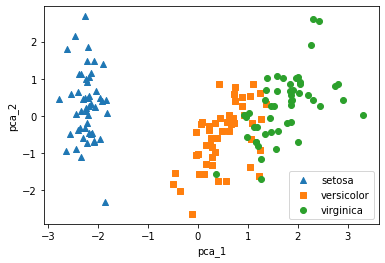

In [8]:
# 위 산출물을 시각화
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = df_iris_pca[df_iris_pca.target==i]['pca_1']
    y_axis_data = df_iris_pca[df_iris_pca.target==i]['pca_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_1')
plt.ylabel('pca_2')


In [9]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
rcf = RandomForestClassifier(random_state=156)
pca_X = df_iris_pca[['pca_1','pca_2']]

scores1 = cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print(scores1,np.mean(scores1))

scores2 = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print(scores2,np.mean(scores2))

[0.98 0.94 0.96] 0.96
[0.88 0.88 0.88] 0.88


[과제] 신용카드 데이터 세트는 30000개의 레코드와 24개의 속성을 가지고 있으며 'default payment next month' 속성이 Target 값으로 연체일 경우 1, 정상납부가 0이다. 23개의 속성 데이터가 있으나 속성간 상관도가 높을 수 있으므로 통계 및 시각화를 통하여 상관도가 높은 속성을 PCA로 변환한 뒤 6개의 컴포넌트로 cross_val_score로 분류 예측을 수행하세요.(기존 속성을 적용하여 분류한 평가 결과와 비교)

In [19]:
card_df = pd.read_excel('./dataset/credit_card.xls',header = 1, sheet_name='Data').iloc[0:,1:]
card_df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)
card_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
X = card_df.drop('default',axis=1)
y = card_df['default']

<AxesSubplot:>

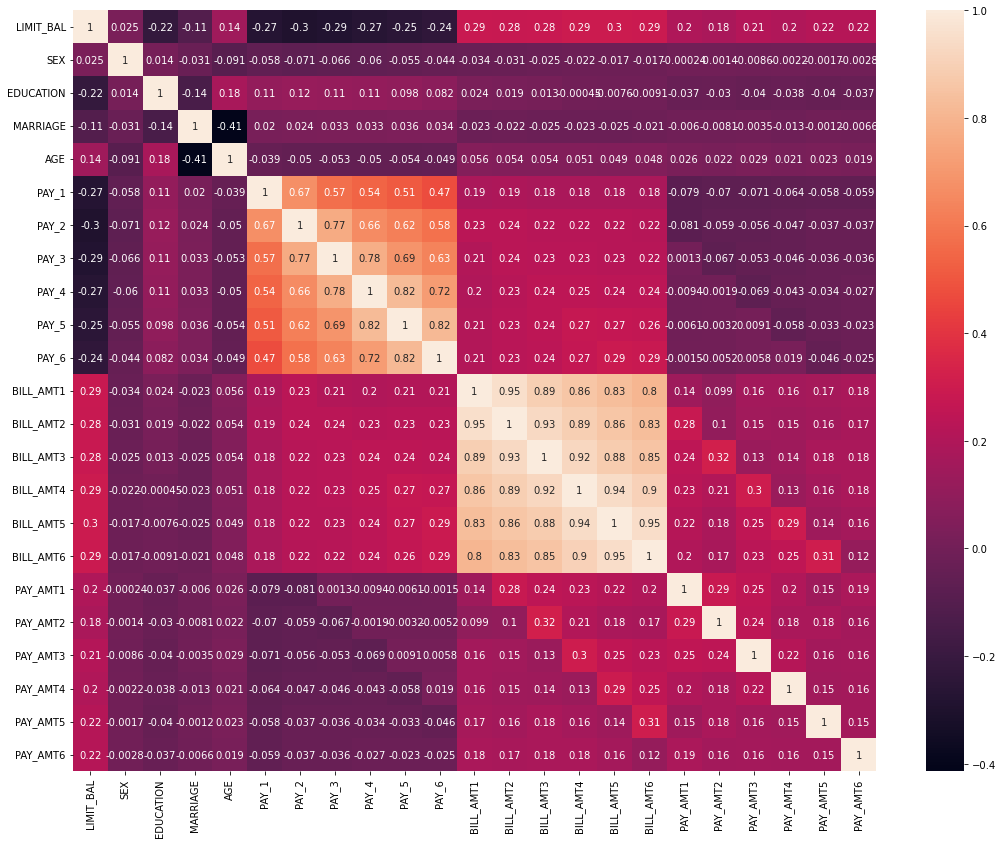

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X.corr()
plt.figure(figsize = (18,14))
sns.heatmap(corr,annot=True)

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print(pca.explained_variance_ratio_)

[0.90555253 0.0509867 ]


In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300,random_state=156)

scores1 = cross_val_score(rcf,X,y,scoring='accuracy',cv=3)
print(scores1,np.mean(scores1))

[0.8083 0.8196 0.8232] 0.8170333333333333


In [28]:
scaler = StandardScaler()
card_df_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 6)
df_pca = pca.fit_transform(card_df_scaled)
scores2 = cross_val_score(rcf,df_pca,y,scoring='accuracy',cv=3)
print(scores2,np.mean(scores2))

[0.7913 0.7975 0.8002] 0.7963333333333334
